In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import numpy as np
import matplotlib.pyplot as plt

2022-11-20 19:36:09.248658: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
tf.__version__

'2.9.1'

Use the following in gitbash or linux cli to get the data into the `./data` folder and then unzip.
```
mkdir data
cd data
wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip 
unzip dino-dragon.zip
```

In [3]:
train_dir = './data/train'
test_dir = './data/test'

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

- `binary crossentropy`
- `focal loss`
- `mean squared error`
- `categorical crossentropy`

Note: since we specify an activation for the output layer, we don't need to set `from_logits=True`

* This is a binary classification problem, so the answer is `binary crossentropy`

### Question 2

What's the total number of parameters of the model? You can use the `summary` method for that. 

- 9215873
- 11215873
- 14215873
- 19215873

In [4]:
inputs = keras.Input(shape=(150, 150, 3))
features = keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
pool_feats = keras.layers.MaxPooling2D((2, 2))(features)
vector = keras.layers.Flatten()(pool_feats)
dense = keras.layers.Dense(64, activation='relu')(vector)
outputs = keras.layers.Dense(1, activation='sigmoid')(dense)

model = keras.Model(inputs=inputs, outputs=outputs)

2022-11-20 19:36:11.578458: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 19:36:11.585723: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 19:36:11.586333: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 19:36:11.587244: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [5]:
optimizer = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                             

### Generators and Training

For the next two questions, use the following data generator for both train and test sets:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/val directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets. 

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

### Question 3

What is the median of training accuracy for all the epochs for this model?

- 0.40
- 0.60
- 0.90
- 0.20

In [7]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                     target_size=(150,150),
                                                     batch_size=20,
                                                     shuffle=True,
                                                     class_mode='binary')

Found 1594 images belonging to 2 classes.


In [9]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 shuffle=True,
                                                 class_mode='binary')

Found 394 images belonging to 2 classes.


In [10]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [11]:
history = model.fit(train_generator,
                     epochs=10,
                     validation_data=test_generator)

Epoch 1/10


2022-11-20 19:36:14.003202: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-20 19:36:14.624220: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-20 19:36:14.625082: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-20 19:36:14.625120: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-20 19:36:14.626114: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-20 19:36:14.626220: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


80/80 [==============================] - 11s 107ms/step - loss: 0.6255 - accuracy: 0.6487 - val_loss: 0.5094 - val_accuracy: 0.8071
Epoch 2/10
80/80 [==============================] - 8s 105ms/step - loss: 0.4609 - accuracy: 0.8105 - val_loss: 0.4068 - val_accuracy: 0.8503
Epoch 3/10
80/80 [==============================] - 8s 105ms/step - loss: 0.3921 - accuracy: 0.8457 - val_loss: 0.4681 - val_accuracy: 0.7589
Epoch 4/10
80/80 [==============================] - 8s 105ms/step - loss: 0.3367 - accuracy: 0.8714 - val_loss: 0.3507 - val_accuracy: 0.8503
Epoch 5/10
80/80 [==============================] - 8s 104ms/step - loss: 0.3111 - accuracy: 0.8708 - val_loss: 0.3867 - val_accuracy: 0.8223
Epoch 6/10
80/80 [==============================] - 8s 104ms/step - loss: 0.2682 - accuracy: 0.9028 - val_loss: 0.3772 - val_accuracy: 0.8325
Epoch 7/10
80/80 [==============================] - 8s 104ms/step - loss: 0.2606 - accuracy: 0.8990 - val_loss: 0.3316 - val_accuracy: 0.8452
Epoch 8/10
80/80

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [13]:
# Median for training accuracy
np.median(history.history['accuracy']).round(2)

0.89

### Question 4

What is the standard deviation of training loss for all the epochs for this model?

- 0.11
- 0.66
- 0.99
- 0.33

In [14]:
# Training loss standard deviation
np.std(history.history['loss']).round(2)

0.13

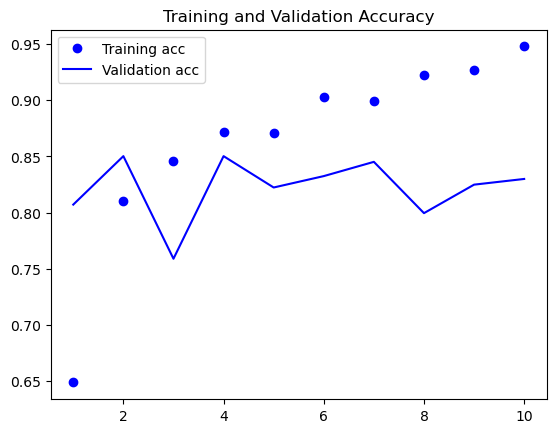

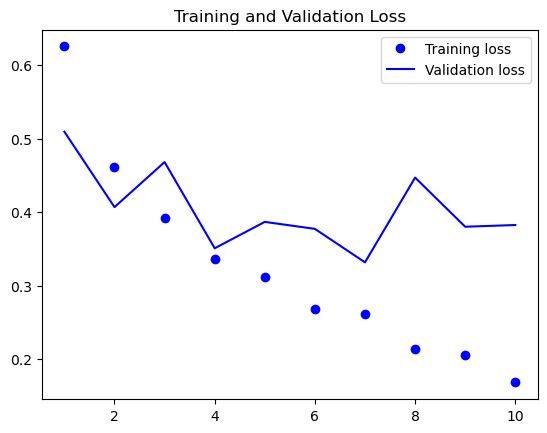

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=40,`
* `width_shift_range=0.2,`
* `height_shift_range=0.2,`
* `shear_range=0.2,`
* `zoom_range=0.2,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

### Question 5 

Let's train our model for 10 more epochs using the same code as previously.
Make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

- 0.15
- 0.77
- 0.37
- 0.97

In [16]:
datagen = keras.preprocessing.image.ImageDataGenerator(
                                                        rotation_range=40,
                                                        width_shift_range=0.2,
                                                        height_shift_range=0.2,
                                                        shear_range=0.2,
                                                        zoom_range=0.2,
                                                        horizontal_flip=True,
                                                        fill_mode='nearest'
)

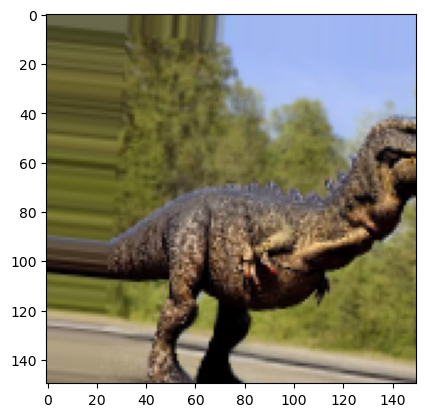

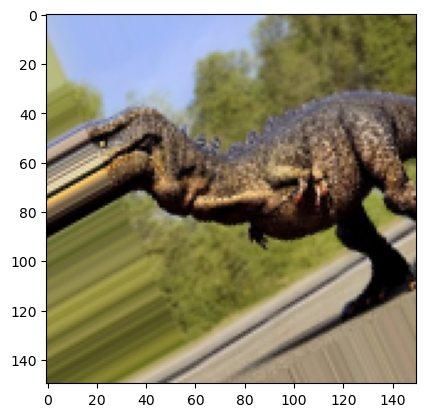

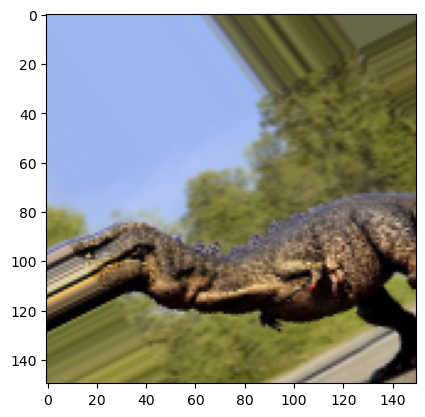

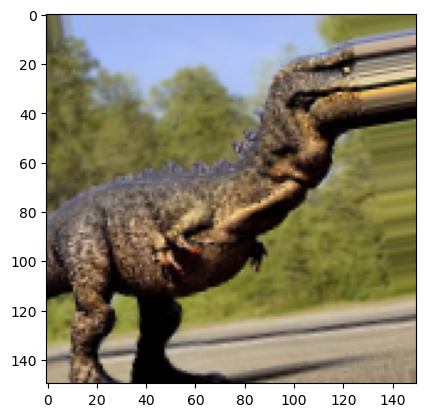

In [17]:

fnames = [os.path.join(train_dir+"/dino", fname) for 
          fname in os.listdir(train_dir+"/dino")]

img_path = fnames[0]

img = keras.preprocessing.image.load_img(img_path, target_size=(150, 150))

x = keras.preprocessing.image.img_to_array(img)

x = np.expand_dims(x, axis=0)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(keras.preprocessing.image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [18]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen =  keras.preprocessing.image.ImageDataGenerator( rescale=1/255 )

In [19]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                     target_size=(150,150),
                                                     batch_size=20,
                                                     shuffle=True,
                                                     class_mode='binary')

Found 1594 images belonging to 2 classes.


In [20]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 shuffle=True,
                                                 class_mode='binary')

Found 394 images belonging to 2 classes.


In [21]:
history = model.fit(train_generator,
                     epochs=10,
                     validation_data=test_generator)

Epoch 1/10
80/80 [==============================] - 15s 187ms/step - loss: 0.4337 - accuracy: 0.8024 - val_loss: 0.2921 - val_accuracy: 0.8680
Epoch 2/10
80/80 [==============================] - 15s 189ms/step - loss: 0.4263 - accuracy: 0.7980 - val_loss: 0.6654 - val_accuracy: 0.7157
Epoch 3/10
80/80 [==============================] - 15s 186ms/step - loss: 0.4074 - accuracy: 0.8143 - val_loss: 0.3478 - val_accuracy: 0.8325
Epoch 4/10
80/80 [==============================] - 15s 186ms/step - loss: 0.4229 - accuracy: 0.8061 - val_loss: 0.5017 - val_accuracy: 0.7614
Epoch 5/10
80/80 [==============================] - 15s 186ms/step - loss: 0.3826 - accuracy: 0.8156 - val_loss: 0.5017 - val_accuracy: 0.7766
Epoch 6/10
80/80 [==============================] - 15s 188ms/step - loss: 0.3783 - accuracy: 0.8149 - val_loss: 0.2622 - val_accuracy: 0.8959
Epoch 7/10
80/80 [==============================] - 15s 186ms/step - loss: 0.3786 - accuracy: 0.8350 - val_loss: 0.3776 - val_accuracy: 0.8350

In [22]:
# Validation(here named Test) loss for augmented results, as we are training from epoch 11 to 20.
np.mean(history.history['val_loss']).round(2)

0.47

### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

- 0.84
- 0.54
- 0.44
- 0.24

In [23]:
# Test accuracy for the augmented training
np.mean(history.history['val_accuracy']).round(2)

0.8

In [24]:
# Test accuracy for the last 5 epochs
np.mean(history.history['val_accuracy'][-5:]).round(2)

0.8

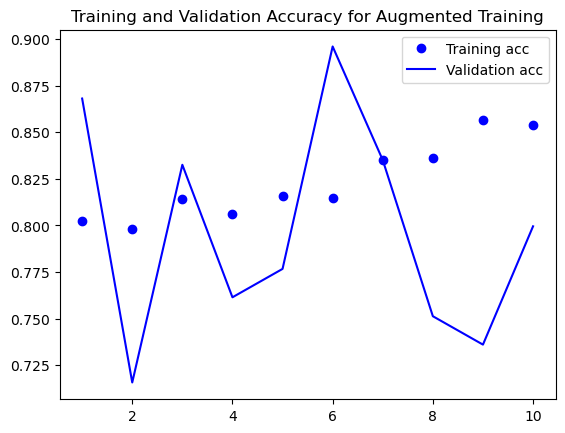

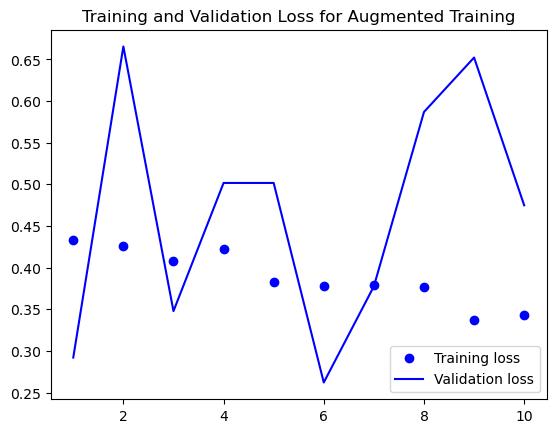

In [25]:
acc_aug = history.history['accuracy']
val_acc_aug = history.history['val_accuracy']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']

epochs_aug = range(1, len(acc_aug) + 1)

plt.plot(epochs_aug, acc_aug, 'bo', label='Training acc')
plt.plot(epochs_aug, val_acc_aug, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy for Augmented Training')
plt.legend()

plt.figure()

plt.plot(epochs_aug, loss_aug, 'bo', label='Training loss')
plt.plot(epochs_aug, val_loss_aug, 'b', label='Validation loss')
plt.title('Training and Validation Loss for Augmented Training')
plt.legend()

plt.show()

We can see that we need to train for longer epochs if we decide to use augmentation and compare our results to the training without augmentation.

---
The end of Week 8 assignment.

---